In [109]:
path = r"/home/kchen/Documents/AL/Data/Raw/Joined"

In [3]:
pip install imblearn

     |████████████████████████████████| 206 kB 4.1 MB/s 
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
np.set_printoptions(threshold=50, edgeitems=20)

In [1]:
from pandas.api.types import CategoricalDtype
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler #ADASYN, SMOTE
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, accuracy_score, auc
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import os

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import roc_auc_score
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score
from sklearn import datasets
import xgboost as xgb
from xgboost import cv

In [4]:
from python_modules.pytorch_tabular import TabularDataset, FeedForwardNN 

ModuleNotFoundError: No module named 'python_modules'

In [3]:
# Set ipython's max row display
pd.set_option('display.max_row', 100)

# Set iPython's max column display
pd.set_option('display.max_columns', 50)


In [3]:
#Open csv file
data = pd.read_csv(r'/home/kchen/Documents/AL/Data/data9.csv', index_col=0)
data.head(20)

,PRNCPTX,CPT,OTHERCPT1,OTHERCPT2,OTHERCPT3,OTHERCPT4,OTHERCPT5,OTHERCPT6,OTHERCPT7,OTHERCPT8,...,TRANSFUS,PRSEPIS,PRSODM,PRBUN,PRCREAT,PRALBUM,PRWBC,PRHCT,PRPLATE,COL_ANASTOMOTIC
CASEID,,,,,,,,,,,,,,,,,,,,,
8080841,4,3,353,625,0,0,0,1,0,0,...,0,0,0.624518,-0.253070,-0.574500,-1.538589,-0.332457,-1.988310,0.722859,0
8080850,4,3,719,280,323,159,0,1,0,0,...,0,1,-0.684040,0.520421,0.037470,-2.097772,-1.302300,-2.110640,-0.794905,0
8080874,8,5,0,0,0,0,0,1,0,0,...,0,0,0.297378,-0.916062,-0.700032,-0.420222,0.809187,-0.415491,1.013494,0
8080921,0,0,719,0,0,0,0,1,0,0,...,0,3,-0.356901,-0.474068,0.100236,-2.843350,0.036084,-2.844622,-1.774455,0
8080981,4,3,689,625,444,308,0,1,0,0,...,0,0,1.278797,-0.363569,-0.244978,0.511750,0.637387,0.650531,-0.299748,0
8080995,3,1,423,300,0,0,0,1,0,0,...,0,0,-1.011180,0.299423,-0.354818,0.698145,-1.052912,0.475773,-0.332041,0
8081002,7,6,416,0,0,0,0,1,0,0,...,0,0,-0.029761,-0.142572,-0.166520,0.138962,1.025324,0.930143,-0.267455,0
8081172,8,5,0,0,0,0,0,1,0,0,...,0,0,1.605937,0.078426,0.131619,-0.793011,-0.637265,-0.765006,-0.138284,0
8081213,8,5,0,0,0,0,0,1,0,0,...,0,0,-0.029761,2.067402,0.743588,-1.165800,0.498837,-1.883455,-0.418155,0


In [ ]:
cat_vars = constants.CATEGORICAL_PRE
con_vars = constants.CONTINUOUS_PRE
cat_ord  = constants.CATEGORICAL_ORDER

In [51]:
cat_cols = ['PRNCPTX', 'OTHERCPT1', 'OTHERCPT2', 'OTHERCPT3', 'OTHERCPT4', 'OTHERCPT5', 'CONCPT1', 'COL_STEROID', 'COL_MECH_BOWEL_PREP', 'COL_ORAL_ANTIBIOTIC', 'COL_CHEMO', 'COL_INDICATION', 'COL_EMERGENT', 'SEX', 'RACE_NEW', 'ETHNICITY_HISPANIC', 'DIABETES', 'SMOKE', 'DYSPNEA', 'FNSTATUS2', 'VENTILAT', 'HXCOPD', 'ASCITES', 'HXCHF', 'HYPERMED', 'RENAFAIL', 'DIALYSIS', 'STEROID', 'WTLOSS', 'BLEEDDIS', 'TRANSFUS', 'PRSEPIS', 'ASACLAS', 'TRANST','WNDCLAS', 'CPT', 'OTHERCPT6', 'OTHERCPT7', 'OTHERCPT8', 'OTHERCPT9', 'OTHERCPT10', 'CONCPT2', 'CONCPT3', 'CONCPT4', 'CONCPT5', 'CONCPT6', 'CONCPT7', 'CONCPT8', 'CONCPT9', 'CONCPT10', 'OPERYR']

In [16]:
for c in cat_cols:
    data[c] = data[c].astype(CategoricalDtype())

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156650 entries, 8080841 to 7813386
Data columns (total 63 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   PRNCPTX              156650 non-null  category
 1   CPT                  156650 non-null  category
 2   OTHERCPT1            156650 non-null  category
 3   OTHERCPT2            156650 non-null  category
 4   OTHERCPT3            156650 non-null  category
 5   OTHERCPT4            156650 non-null  category
 6   OTHERCPT5            156650 non-null  category
 7   OTHERCPT6            156650 non-null  category
 8   OTHERCPT7            156650 non-null  category
 9   OTHERCPT8            156650 non-null  category
 10  OTHERCPT9            156650 non-null  category
 11  OTHERCPT10           156650 non-null  category
 12  CONCPT1              156650 non-null  category
 13  CONCPT2              156650 non-null  category
 14  CONCPT3              156650 non-null  categor

In [33]:
num_cols = ['AGE', 'HEIGHT', 'WEIGHT', 'BMI', 'PRSODM', 'PRBUN', 'PRCREAT', 'PRALBUM', 'PRWBC', 'PRHCT', 'PRPLATE']

In [18]:
#Split into training and test data
y = data['COL_ANASTOMOTIC']
features = ['PRNCPTX', 'CPT', 'OTHERCPT1', 'OTHERCPT2', 'OTHERCPT3', 'OTHERCPT4', 'OTHERCPT5', 'OTHERCPT6', 'OTHERCPT7', 'OTHERCPT8', 'OTHERCPT9', 'OTHERCPT10','CONCPT1', 'CONCPT2', 'CONCPT3', 'CONCPT4', 'CONCPT5', 'CONCPT6', 'CONCPT7', 'CONCPT8', 'CONCPT9', 'CONCPT10','OPERYR', 'SEX', 'AGE', 'HEIGHT', 'WEIGHT', 'BMI', 'RACE_NEW', 'ETHNICITY_HISPANIC', 'COL_INDICATION', 'COL_EMERGENT', 'COL_STEROID', 'COL_MECH_BOWEL_PREP', 'COL_ORAL_ANTIBIOTIC', 'COL_CHEMO', 'TRANST','WNDCLAS','ASACLAS', 'DIABETES', 'SMOKE', 'DYSPNEA', 'FNSTATUS2', 'VENTILAT', 'HXCOPD', 'ASCITES', 'HXCHF', 'HYPERMED', 'RENAFAIL', 'DIALYSIS', 'STEROID', 'WTLOSS', 'BLEEDDIS', 'TRANSFUS', 'PRSEPIS', 'PRSODM', 'PRBUN', 'PRCREAT',  'PRALBUM', 'PRWBC', 'PRHCT', 'PRPLATE']
X = data[features]


In [19]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

In [10]:
y_train.value_counts()

0.0    121402
1.0      3918
Name: COL_ANASTOMOTIC, dtype: int64

In [20]:
# Define model, predict, score
model1 = RandomForestClassifier(n_estimators=1000, min_samples_leaf=5, n_jobs=6, random_state=0)
model1.fit(X_train, y_train)
preds = model1.predict(X_train)
score = roc_auc_score(y_valid, preds)
print('AUC:', score)

ValueError: Found input variables with inconsistent numbers of samples: [31330, 125320]

In [37]:
recall_score(y_valid, model1.predict(X_valid))

0.0

In [63]:
tf = X_train.copy()
    
for v in cat_cols: 
        tf[v] = tf[v].astype('str')
        
tf = pd.get_dummies(tf, columns = cat_cols, drop_first=True )

In [64]:
vf = X_train.copy()
for v in cat_cols:
        vf[v] = vf[v].astype('str')
vf = pd.get_dummies(vf, columns = cat_cols, drop_first=True)

In [79]:
model = RandomForestClassifier()

In [80]:
scores = cross_val_score(model, X, y, cv=5, scoring='roc_auc', n_jobs=6)
print(scores)

[0.60000064 0.57695165 0.62127978 0.58369228 0.60442294]


In [71]:
D_train = xgb.DMatrix(X_train, label=y_train, enable_categorical=True)
D_test = xgb.DMatrix(X_valid, label=y_valid, enable_categorical=True)

In [48]:
xgb_seed = 0

In [53]:
def xgboost_train(train_features, train_labels, xgb_seed):
    
    tf = train_features.copy()
    
    for v in cat_cols: 
        tf[v] = tf[v].astype('str')
        
    tf = pd.get_dummies(tf, columns = cat_cols, drop_first=True )
    
    model = XGBClassifier(seed=xgb_seed)
    model.fit(tf, train_labels)
    var_names = list(tf)
    var_imps = model.feature_importances_#rf_feat_importance(model, tf)
    df_vi = pd.DataFrame({'var':var_names, 'imp':var_imps})
    
    
    
    return model, df_vi


In [60]:
def xgboost_test(model, test_features):

    vf = test_features.copy()
    
    for v in cat_cols: 
        vf[v] = vf[v].astype('str')
    
    vf = pd.get_dummies(vf, columns = cat_cols, drop_first=True)

    guess = model.predict_proba(vf) #compare it to test_target_cat

    return guess[:,1]


In [61]:
# xgb
xgb_model, xgb_var_imp = xgboost_train(X_train, y_train, xgb_seed)
xgb_train_results = xgboost_test(xgb_model, X_train)
xgb_valid_results = xgboost_test(xgb_model, X_valid)
print('\n')
print('GRADIENT BOOSTING MACHINE - done') 

/home/kchen/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
[10:43:39] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBoostError: [10:49:02] ../src/predictor/cpu_predictor.cc:258: Check failed: m->NumColumns() == model.learner_model_param->num_feature (2875 vs. 5620) : Number of columns in data must equal to trained model.
Stack trace:
  [bt] (0) /home/kchen/.local/lib/python3.9/site-packages/xgboost/lib/libxgboost.so(+0x9133f) [0x7f0cc82cd33f]
  [bt] (1) /home/kchen/.local/lib/python3.9/site-packages/xgboost/lib/libxgboost.so(+0x2429e8) [0x7f0cc847e9e8]
  [bt] (2) /home/kchen/.local/lib/python3.9/site-packages/xgboost/lib/libxgboost.so(+0x2446dd) [0x7f0cc84806dd]
  [bt] (3) /home/kchen/.local/lib/python3.9/site-packages/xgboost/lib/libxgboost.so(+0x1982f1) [0x7f0cc83d42f1]
  [bt] (4) /home/kchen/.local/lib/python3.9/site-packages/xgboost/lib/libxgboost.so(+0x1ce777) [0x7f0cc840a777]
  [bt] (5) /home/kchen/.local/lib/python3.9/site-packages/xgboost/lib/libxgboost.so(+0x9cbfe) [0x7f0cc82d8bfe]
  [bt] (6) /home/kchen/.local/lib/python3.9/site-packages/xgboost/lib/libxgboost.so(XGBoosterPredictFromDense+0x225) [0x7f0cc82c0005]
  [bt] (7) /lib/x86_64-linux-gnu/libffi.so.8(+0x7249) [0x7f0d4a27f249]
  [bt] (8) /lib/x86_64-linux-gnu/libffi.so.8(+0x6639) [0x7f0d4a27e639]



In [62]:
xgb_model.feature_importances_

array([0.00432784, 0.00440693, 0.00431092, 0.00461619, 0.00434359,
       0.00436116, 0.00419163, 0.0047793 , 0.00413488, 0.00443866,
       0.00447219, 0.        , 0.        , 0.00414954, 0.0047218 ,
       0.        , 0.01130769, 0.00730975, 0.00779177, 0.00511589, ...,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.00392698,
       0.00446195, 0.0040753 , 0.00473062, 0.00421949, 0.00499309],
      dtype=float32)

In [59]:
xgb_var_imp.sort_values(by='imp', ascending=False).head(20)

,var,imp
4095,COL_ORAL_ANTIBIOTIC_2,0.015382
16,PRNCPTX_6,0.011308
2073,OTHERCPT3_235,0.010957
4092,COL_MECH_BOWEL_PREP_2,0.010082
516,OTHERCPT1_458,0.008793
4138,ASCITES_1,0.008739
4160,WNDCLAS_1,0.008611
4123,RACE_NEW_4,0.008254
2046,OTHERCPT3_210,0.007851
18,PRNCPTX_8,0.007792


In [ ]:
def generate_results_roc(y_test, y_score):
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f' + str(roc_auc))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, .2])
    plt.ylim([0.0, .6])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic curve')
    plt.show()
    print('AUC: ' , roc_auc)

In [81]:
model3 = xgb.cv(param, D_train, metric='auc', nfold=5, early_stopping_rounds=10)

TypeError: cv() got an unexpected keyword argument 'metric'

Text(0.5, 0, 'Round')

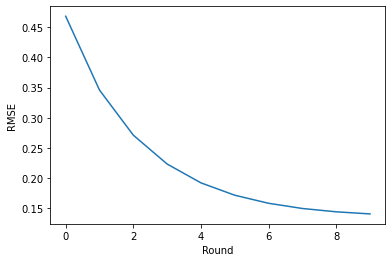

In [76]:
plt.plot(model3.iloc[:,0])
plt.ylabel("RMSE")
plt.xlabel('Round')


In [78]:
model3.plot_importance()
plt.figure(figsize = (16, 12))
plt.show()

AttributeError: 'DataFrame' object has no attribute 'plot_importance'

In [36]:
preds = model3.predict(D_test)
score = roc_auc_score(y_valid, preds)
print(score)

AttributeError: 'DataFrame' object has no attribute 'predict'

In [25]:
scores = cross_val_score(model3, X, y, cv=5, scoring='roc_auc', n_jobs=6)
print(scores)

TypeError: estimator should be an estimator implementing 'fit' method, <xgboost.core.Booster object at 0x7f0cc250a400> was passed

In [27]:
xgb.plot_importance(model3)
plt.figure(figsize=(16, 12))
plt.show()

XGBoostError: [09:38:23] ../include/xgboost/feature_map.h:85: unknown feature type, use i for indicator and q for quantity
Stack trace:
  [bt] (0) /home/kchen/.local/lib/python3.9/site-packages/xgboost/lib/libxgboost.so(+0x9133f) [0x7f0cc82cd33f]
  [bt] (1) /home/kchen/.local/lib/python3.9/site-packages/xgboost/lib/libxgboost.so(XGBoosterDumpModelExWithFeatures+0x304) [0x7f0cc82c3264]
  [bt] (2) /lib/x86_64-linux-gnu/libffi.so.8(+0x7249) [0x7f0d4a27f249]
  [bt] (3) /lib/x86_64-linux-gnu/libffi.so.8(+0x6639) [0x7f0d4a27e639]
  [bt] (4) /usr/lib/python3.9/lib-dynload/_ctypes.cpython-39-x86_64-linux-gnu.so(+0x14369) [0x7f0d4a2ab369]
  [bt] (5) /usr/lib/python3.9/lib-dynload/_ctypes.cpython-39-x86_64-linux-gnu.so(+0xa30d) [0x7f0d4a2a130d]
  [bt] (6) /bin/python3(_PyObject_MakeTpCall+0x39b) [0x521d6b]
  [bt] (7) /bin/python3(_PyEval_EvalFrameDefault+0x5be8) [0x51b9f8]
  [bt] (8) /bin/python3() [0x514a75]



In [41]:
def rf_feat_importance(model, X):
    return pd.DataFrame({'cols':X.columns, 'imp':model1.feature_importances_}
                       ).sort_values('imp', ascending=False)

In [42]:
fi = rf_feat_importance(model, X)
fi[:10]

,cols,imp
61,PRPLATE,0.069825
27,BMI,0.068587
60,PRHCT,0.066685
59,PRWBC,0.065600
26,WEIGHT,0.064306
57,PRCREAT,0.061433
24,AGE,0.058748
56,PRBUN,0.051259
58,PRALBUM,0.043037
25,HEIGHT,0.042753


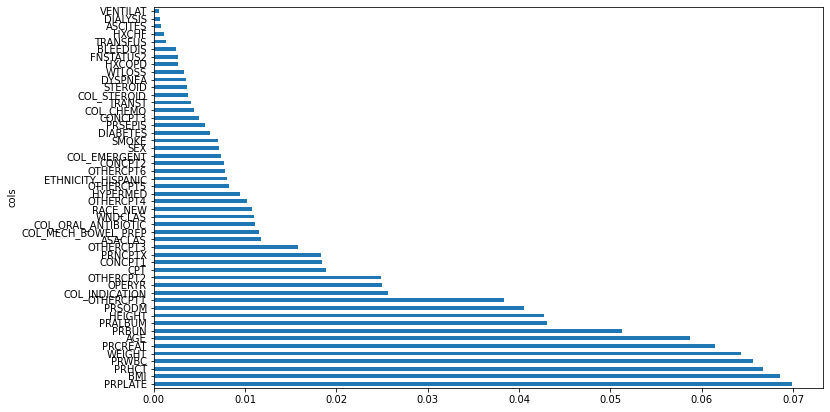

In [43]:
def plot_fi(fi):
    return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

plot_fi(fi[:50]);